<a href="https://colab.research.google.com/github/cloudhood/learning-basics/blob/main/notebooks/gam_1992_mackerel_egg_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%load_ext rpy2.ipython

In [11]:
!wget https://www.maths.ed.ac.uk/~swood34/SIP/mt1007_0.0-7.zip

--2022-07-16 15:32:36--  https://www.maths.ed.ac.uk/~swood34/SIP/mt1007_0.0-7.zip
Resolving www.maths.ed.ac.uk (www.maths.ed.ac.uk)... 129.215.255.44
Connecting to www.maths.ed.ac.uk (www.maths.ed.ac.uk)|129.215.255.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1141603 (1.1M) [application/zip]
Saving to: ‘mt1007_0.0-7.zip’

mt1007_0.0-7.zip    100%[===================>]   1.09M  1.24MB/s    in 0.9s    

2022-07-16 15:32:37 (1.24 MB/s) - ‘mt1007_0.0-7.zip’ saved [1141603/1141603]



In [13]:
!unzip mt1007_0.0-7.zip

Archive:  mt1007_0.0-7.zip
   creating: mt1007/
  inflating: mt1007/DESCRIPTION      
   creating: mt1007/Meta/
  inflating: mt1007/Meta/package.rds  
  inflating: mt1007/Meta/Rd.rds      
  inflating: mt1007/Meta/hsearch.rds  
  inflating: mt1007/Meta/data.rds    
   creating: mt1007/libs/
  inflating: mt1007/libs/mt1007.dll  
   creating: mt1007/R/
  inflating: mt1007/R/mt1007         
   creating: mt1007/data/
  inflating: mt1007/data/00Index     
  inflating: mt1007/data/GT150.rda   
  inflating: mt1007/data/bath.rda    
  inflating: mt1007/data/bound.rda   
  inflating: mt1007/data/coast.rda   
  inflating: mt1007/data/cod.rda     
  inflating: mt1007/data/cont.200m.rda  
  inflating: mt1007/data/herring.rda  
  inflating: mt1007/data/hprice.rda  
  inflating: mt1007/data/islay.rda   
  inflating: mt1007/data/mack.epsf.rda  
  inflating: mt1007/data/mack.fish.rda  
  inflating: mt1007/data/mack.rda    
  inflating: mt1007/data/mackp.rda   
  inflating: mt1007/data/nh600.rda   
  i

In [53]:
%%R
load(file = "mt1007/data/bound.rda")     # Survey boundary
load(file = "mt1007/data/coast.rda")     # Coast of Europe
load(file = "mt1007/data/mack.rda")      # Location of mackarel survey
load(file = "mt1007/data/cont.200m.rda") # 200m sea bed depth contour  
load(file = "mt1007/data/bath.rda")      # Seabed depths averaged over 1/12th degree squares arranged on a regular grid

In [47]:
%%R
egg_dens = mack$egg.dens / 150 + .2
summary(egg_dens)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2000  0.2000  0.2342  0.4548  0.4765  4.2119 


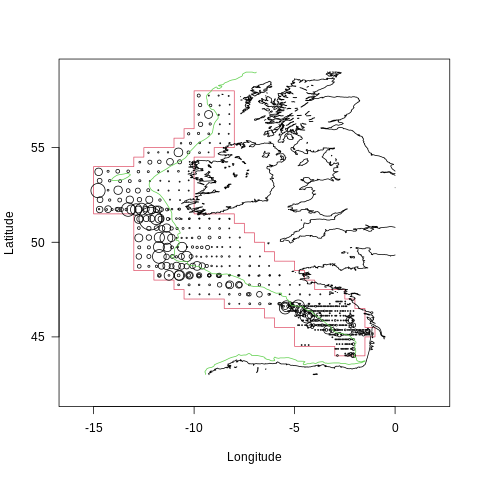

In [50]:
%%R 
with(bound, plot(lon, lat, type="l", xlab="Longitude", ylab="Latitude", 
                 xlim = c(-16, 2), ylim = c(42, 59), las = 1, col = 2))
with(coast, lines(lon, lat, col = 1))
with(mack, points(lon, lat, cex = egg_dens))
with(cont.200m, lines(lon, lat, col = 3))

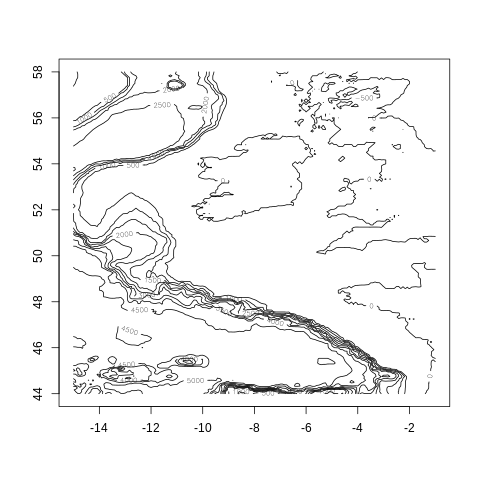

In [54]:
%%R
with(bath, contour(lon, lat, b.depth))

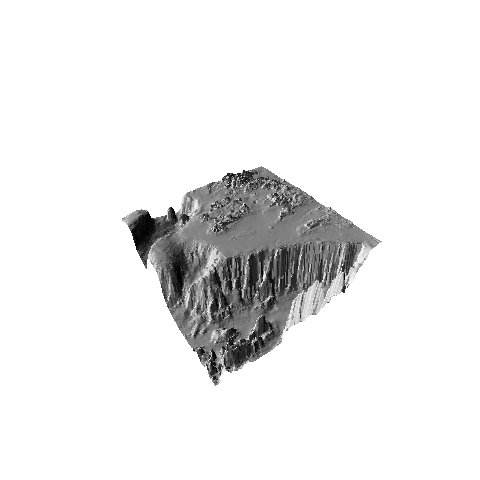

In [56]:
%%R
with(bath, persp(lon, lat, -b.depth, zlim=c(-6000, 10000), 
                 phi = 35,theta = -35, border = NA, 
                 shade = 0.99, box = FALSE))

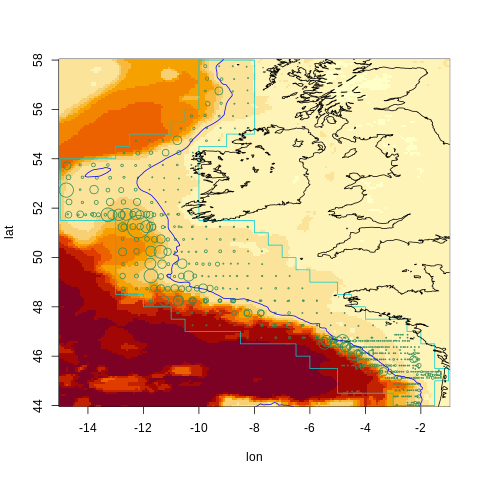

In [69]:
%%R
with(bath, image(lon, lat, b.depth))
with(bound, lines(lon, lat, type="l", xlab="Longitude", ylab="Latitude", 
                 xlim = c(-16, 2), ylim = c(42, 59), las = 1, col = "darkturquoise"))
with(coast, lines(lon, lat, col = 1))
with(mack, points(lon, lat, cex = egg_dens, col = "seagreen"))
with(cont.200m, lines(lon, lat, col = "blue"))

In [1]:
%%R
plot(abs(runif(100) - 0.5) ** 3)

UsageError: Cell magic `%%R` not found.
